In [438]:
import os
#os.getcwd()
import warnings
warnings.filterwarnings('ignore')

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import sklearn
import scipy.integrate as integrate
import scipy

import statsmodels.api as sm
from statsmodels.formula.api  import ols
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# importing algorithm, evaluation, and modeL libraries 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [439]:
churn_data = pd.read_csv('churn.csv')

In [440]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,...,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
0,2907-ILJBN,Female,0.0,Yes,Yes,11.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,233.90,No
1,3896-RCYYE,Female,0.0,No,No,67.0,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),53.40,3579.15,No
2,9764-REAFF,Female,0.0,Yes,No,59.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,No
3,6651-RLGGM,Male,0.0,Yes,Yes,67.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.30,1688.90,No
4,5879-SESNB,Female,0.0,No,No,11.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,75.25,888.65,No


In [441]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12335 entries, 0 to 12334
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               12335 non-null  object 
 1   gender                   12335 non-null  object 
 2   SeniorCitizen            12335 non-null  float64
 3   Partner                  12335 non-null  object 
 4   Dependents               12335 non-null  object 
 5   tenure                   12335 non-null  float64
 6   CallService              12335 non-null  object 
 7   MultipleConnections      12335 non-null  object 
 8   InternetConnection       12335 non-null  object 
 9   OnlineSecurity           12335 non-null  object 
 10  OnlineBackup             12335 non-null  object 
 11  DeviceProtectionService  12335 non-null  object 
 12  TechnicalHelp            12335 non-null  object 
 13  OnlineTV                 12335 non-null  object 
 14  OnlineMovies          

In [442]:
churn_data = churn_data.drop_duplicates()
churn_data.shape

(9328, 21)

# data has no null values

In [443]:
churn_data.isnull().sum()

customerID                 0
gender                     0
SeniorCitizen              0
Partner                    0
Dependents                 0
tenure                     0
CallService                0
MultipleConnections        0
InternetConnection         0
OnlineSecurity             0
OnlineBackup               0
DeviceProtectionService    0
TechnicalHelp              0
OnlineTV                   0
OnlineMovies               0
Agreement                  0
BillingMethod              0
PaymentMethod              0
MonthlyServiceCharges      0
TotalAmount                0
Churn                      0
dtype: int64

# dropping customerID

In [444]:
churn_data = churn_data.drop(['customerID'],axis=1)
churn_data.isnull().sum()

gender                     0
SeniorCitizen              0
Partner                    0
Dependents                 0
tenure                     0
CallService                0
MultipleConnections        0
InternetConnection         0
OnlineSecurity             0
OnlineBackup               0
DeviceProtectionService    0
TechnicalHelp              0
OnlineTV                   0
OnlineMovies               0
Agreement                  0
BillingMethod              0
PaymentMethod              0
MonthlyServiceCharges      0
TotalAmount                0
Churn                      0
dtype: int64

In [445]:
y=churn_data[['Churn']]
x=churn_data.drop(['Churn'],axis=1)
y.shape

(9328, 1)

# finding the % of churn-Yes Or the mean of Y = Yes

In [446]:
y['Churn'].value_counts()

Yes    5607
No     3721
Name: Churn, dtype: int64

In [447]:
# finding genders distribution with churners
churn_percent = (y['Churn'].value_counts() / len(y) * 100)
print(churn_percent)
y_temp = pd.DataFrame(y)
y_temp = np.where(y_temp['Churn']=='No',0,1)
print('churn_percent ',y_temp.mean())


Yes    60.109348
No     39.890652
Name: Churn, dtype: float64
churn_percent  0.6010934819897084


# spitting the features categroical & numeric separtely

In [448]:
x_num=x.select_dtypes(include="number")
x_cat=x.select_dtypes(include="object")

# numeric fields

In [449]:
x_num.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyServiceCharges', 'TotalAmount'], dtype='object')

In [450]:
x_num.describe()

,SeniorCitizen,tenure,MonthlyServiceCharges,TotalAmount
count,9328.000000,9328.000000,9328.000000,9328.000000
mean,0.163885,26.642965,61.341895,1839.159069
std,0.351640,22.491378,27.661949,2008.858997
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,6.700780,35.392830,288.599227
50%,0.000000,20.325530,64.220312,1052.258266
75%,0.000000,44.345050,84.070699,2777.241953
max,1.000000,72.000000,118.750000,8684.800000


In [451]:
x_num['SeniorCitizen'].value_counts()

0.000000    7420
1.000000    1155
0.660002       1
0.208768       1
0.437521       1
            ... 
0.087772       1
0.353116       1
0.387478       1
0.031710       1
0.433856       1
Name: SeniorCitizen, Length: 755, dtype: int64

# Senior citizen should be Yes or No (1 or 0). But we have some float values here.Incorrect records are about 753 rows. Close to 6% of the data. So replacing them with mode, which is 0.

In [452]:
x_num['SeniorCitizen'] = np.where((x_num['SeniorCitizen'] > 0) & (x_num['SeniorCitizen'] < 1),0,x_num['SeniorCitizen'])
x['SeniorCitizen'].value_counts()

0.000000    7420
1.000000    1155
0.660002       1
0.208768       1
0.437521       1
            ... 
0.087772       1
0.353116       1
0.387478       1
0.031710       1
0.433856       1
Name: SeniorCitizen, Length: 755, dtype: int64

In [453]:
x_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9328 entries, 0 to 12334
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   9328 non-null   object
 1   Partner                  9328 non-null   object
 2   Dependents               9328 non-null   object
 3   CallService              9328 non-null   object
 4   MultipleConnections      9328 non-null   object
 5   InternetConnection       9328 non-null   object
 6   OnlineSecurity           9328 non-null   object
 7   OnlineBackup             9328 non-null   object
 8   DeviceProtectionService  9328 non-null   object
 9   TechnicalHelp            9328 non-null   object
 10  OnlineTV                 9328 non-null   object
 11  OnlineMovies             9328 non-null   object
 12  Agreement                9328 non-null   object
 13  BillingMethod            9328 non-null   object
 14  PaymentMethod            9328 non-null 

In [454]:
x_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9328 entries, 0 to 12334
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SeniorCitizen          9328 non-null   float64
 1   tenure                 9328 non-null   float64
 2   MonthlyServiceCharges  9328 non-null   float64
 3   TotalAmount            9328 non-null   float64
dtypes: float64(4)
memory usage: 364.4 KB


# treating outliers for numeric columns tenure, MonthlySericeCharges, TotalAmount

In [455]:
upper_limit = x_num['MonthlyServiceCharges'].quantile(0.99)
lower_limit = x_num['MonthlyServiceCharges'].quantile(0.01)
x_num['MonthlyServiceCharges'] = np.where(x_num['MonthlyServiceCharges'] >= upper_limit, upper_limit, np.where(x_num['MonthlyServiceCharges'] <= lower_limit, lower_limit, x_num['MonthlyServiceCharges']))

In [456]:
upper_limit = x_num['tenure'].quantile(0.99)
lower_limit = x_num['tenure'].quantile(0.01)
x_num['tenure'] = np.where(x_num['tenure'] >= upper_limit, upper_limit, np.where(x_num['tenure'] <= lower_limit, lower_limit, x_num['tenure']))

In [457]:
upper_limit = x_num['TotalAmount'].quantile(0.99)
lower_limit = x_num['TotalAmount'].quantile(0.01)
x_num['TotalAmount'] = np.where(x_num['TotalAmount'] >= upper_limit, upper_limit, np.where(x_num['TotalAmount'] <= lower_limit, lower_limit, x_num['TotalAmount']))

In [458]:
# checking after outlier treatment
x_num.describe()

,SeniorCitizen,tenure,MonthlyServiceCharges,TotalAmount
count,9328.000000,9328.000000,9328.000000,9328.000000
mean,0.123821,26.642965,61.317044,1835.677311
std,0.329395,22.491378,27.607443,1998.063713
min,0.000000,1.000000,19.300000,20.200000
25%,0.000000,6.700780,35.392830,288.599227
50%,0.000000,20.325530,64.220312,1052.258266
75%,0.000000,44.345050,84.070699,2777.241953
max,1.000000,72.000000,112.236500,7780.474000


# discretizing tenure column

In [459]:

x_tenure_binned = x_num['tenure']  
x_tenure_binned = x_tenure_binned.values.reshape(-1, 1)
est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
Xt = est.fit_transform(x_tenure_binned) 

In [460]:
x_num['tenure'] = Xt
x_num['tenure'].shape

(9328,)

# data visualization of numeric to numeric and selecting all the 3 numeric features as slope is good

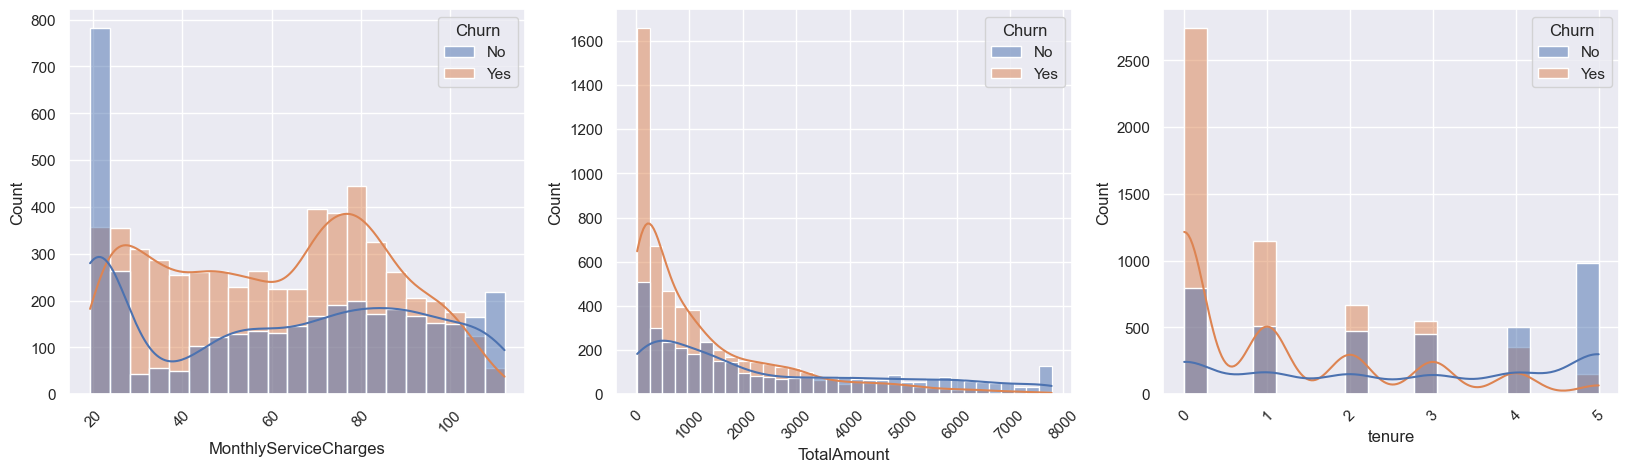

In [461]:

plt.figure(figsize = (20,5))
num_cols = ['MonthlyServiceCharges', 'TotalAmount','tenure']
for col in enumerate(num_cols):                                       
    plt.subplot(1,3,col[0]+1)                                     
    sns.histplot(data = x_num, x = col[1], kde = True, hue = y['Churn'])
    plt.xticks(rotation =45)


# scaling the numeric fields

In [462]:
#x_num_scaled = x_num[['MonthlyServiceCharges','TotalAmount']]
scaler = MinMaxScaler()
#x_num = x_num.values.reshape(1,-1)
x_num[["MonthlyServiceCharges"]] = scaler.fit_transform(x_num[["MonthlyServiceCharges"]])
x_num[["TotalAmount"]] = scaler.fit_transform(x_num[["TotalAmount"]])
x_num.head()


,SeniorCitizen,tenure,MonthlyServiceCharges,TotalAmount
0,0.0,0.0,0.013988,0.027538
1,0.0,5.0,0.366917,0.458611
2,0.0,4.0,0.000000,0.133713
3,0.0,5.0,0.075320,0.215031
4,0.0,0.0,0.602024,0.111910


# data visulation of categorical features

In [463]:
x_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9328 entries, 0 to 12334
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   9328 non-null   object
 1   Partner                  9328 non-null   object
 2   Dependents               9328 non-null   object
 3   CallService              9328 non-null   object
 4   MultipleConnections      9328 non-null   object
 5   InternetConnection       9328 non-null   object
 6   OnlineSecurity           9328 non-null   object
 7   OnlineBackup             9328 non-null   object
 8   DeviceProtectionService  9328 non-null   object
 9   TechnicalHelp            9328 non-null   object
 10  OnlineTV                 9328 non-null   object
 11  OnlineMovies             9328 non-null   object
 12  Agreement                9328 non-null   object
 13  BillingMethod            9328 non-null   object
 14  PaymentMethod            9328 non-null 

In [464]:
cat_cols = x_cat.columns
list(enumerate(cat_cols))

[(0, 'gender'),
 (1, 'Partner'),
 (2, 'Dependents'),
 (3, 'CallService'),
 (4, 'MultipleConnections'),
 (5, 'InternetConnection'),
 (6, 'OnlineSecurity'),
 (7, 'OnlineBackup'),
 (8, 'DeviceProtectionService'),
 (9, 'TechnicalHelp'),
 (10, 'OnlineTV'),
 (11, 'OnlineMovies'),
 (12, 'Agreement'),
 (13, 'BillingMethod'),
 (14, 'PaymentMethod')]

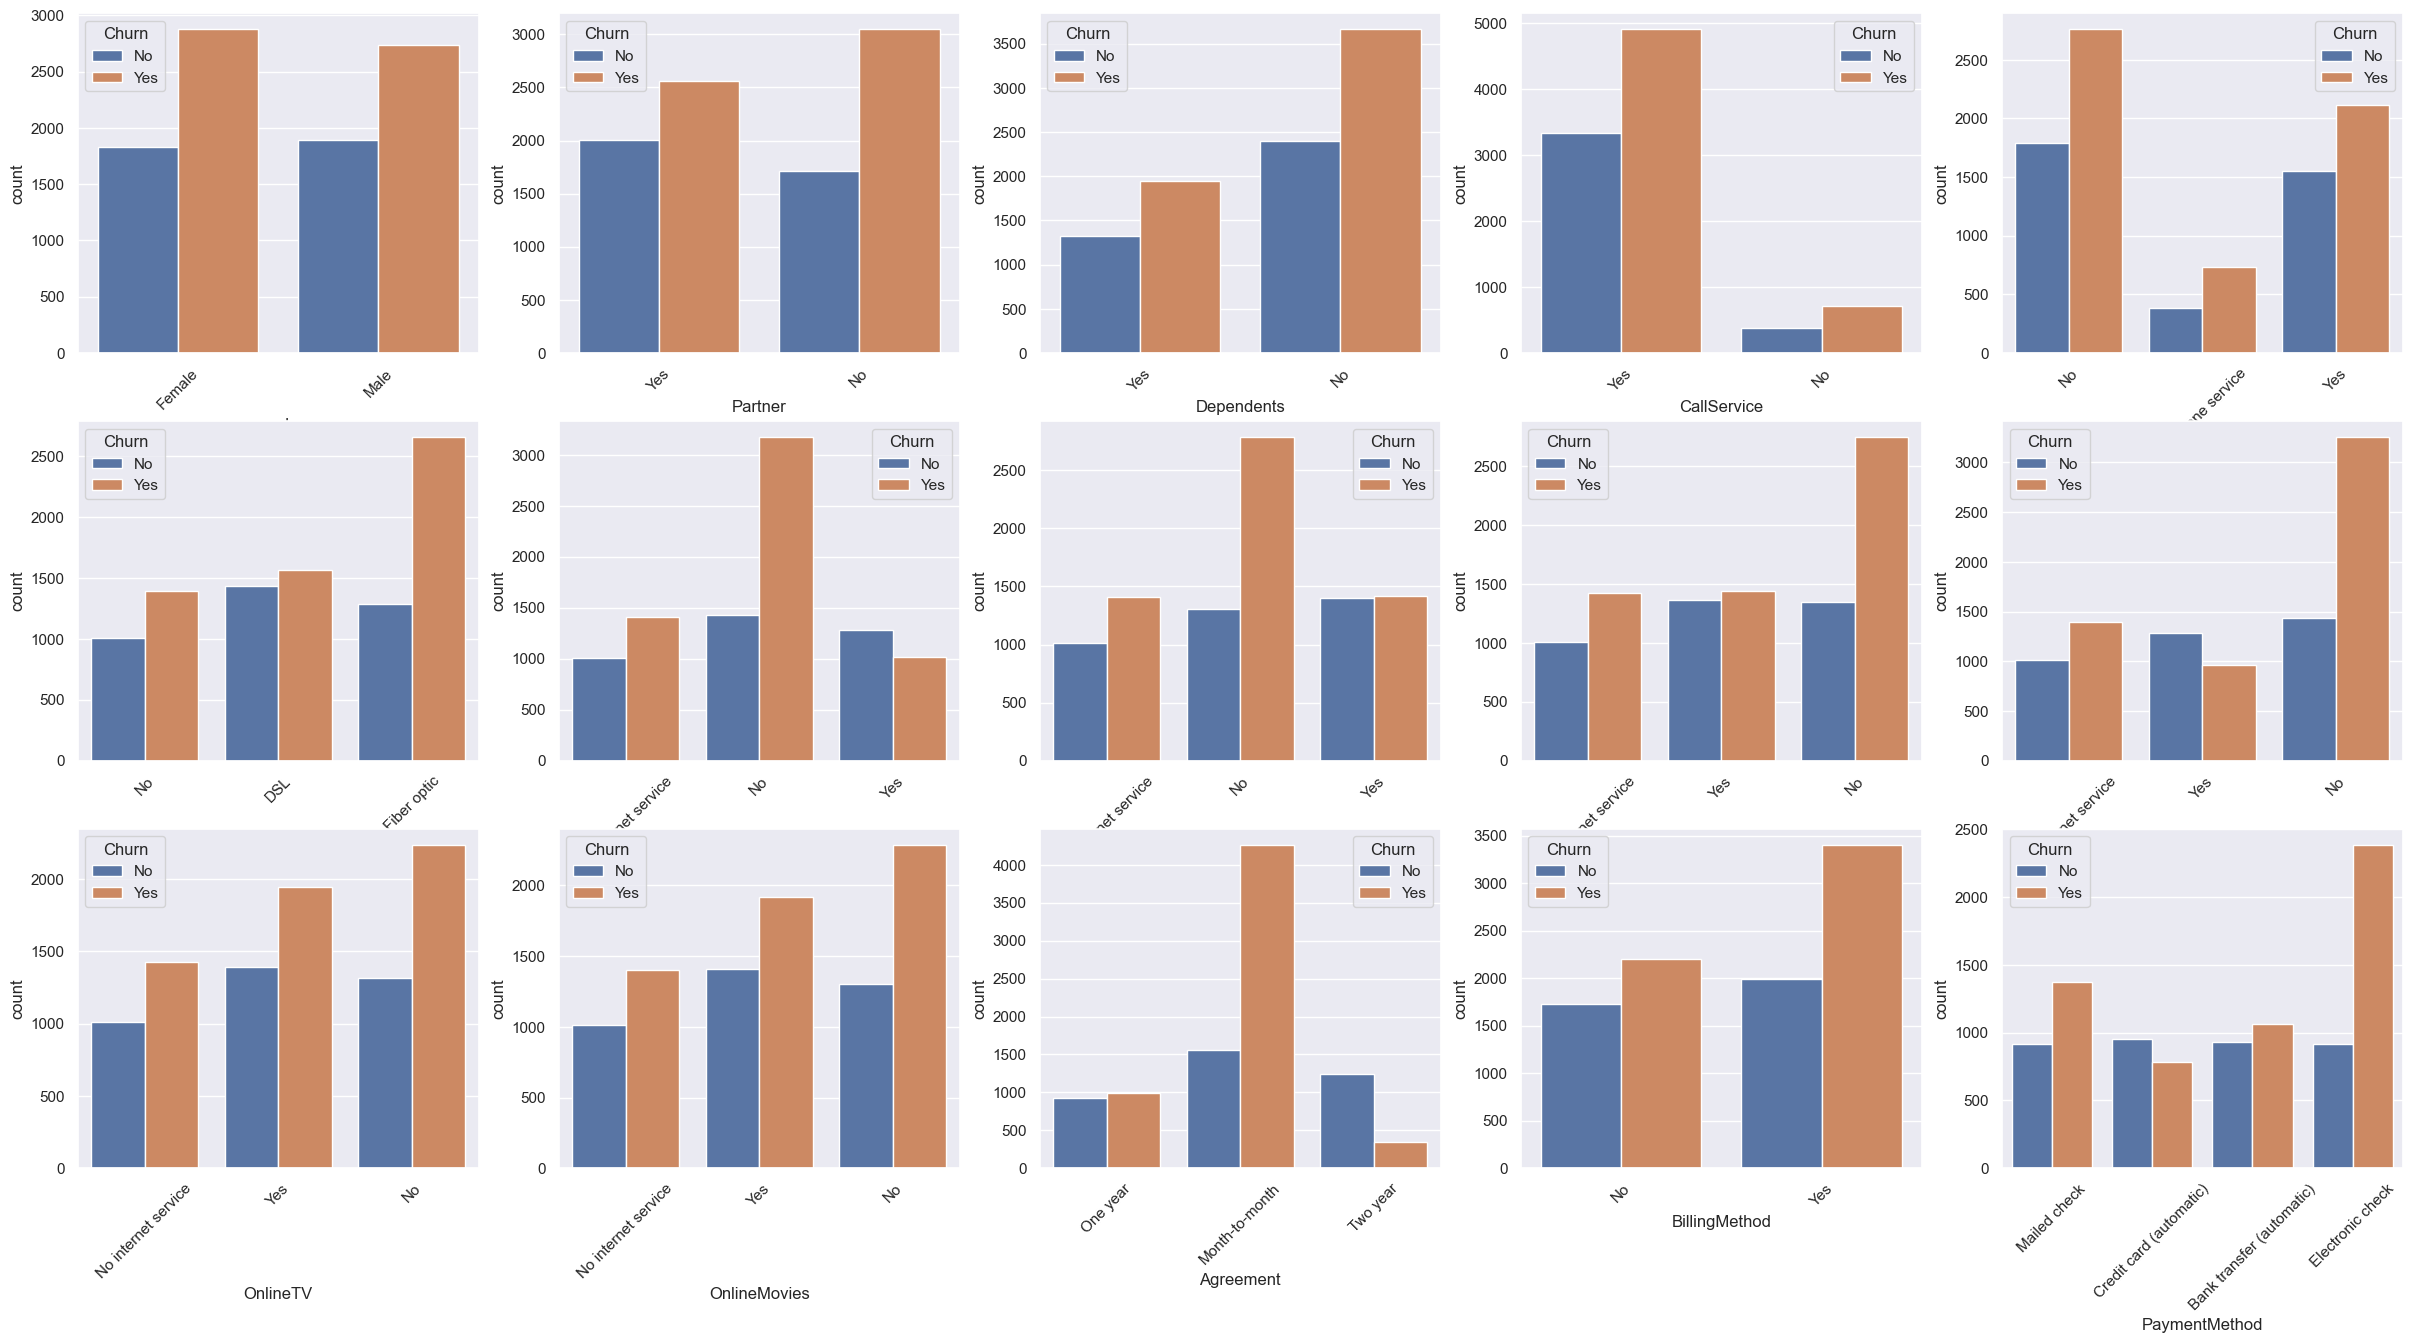

In [465]:
plt.figure(figsize = (30,15))
for col in enumerate(cat_cols):                                       
    plt.subplot(3,5,col[0]+1)                                     
    sns.countplot(x=col[1], hue=y['Churn'], data=x_cat)
    plt.xticks(rotation =45)

# dropping gender, partner as there is any big variance

In [466]:
x_cat = x_cat.drop(['gender','Partner'],axis=1)
x_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9328 entries, 0 to 12334
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Dependents               9328 non-null   object
 1   CallService              9328 non-null   object
 2   MultipleConnections      9328 non-null   object
 3   InternetConnection       9328 non-null   object
 4   OnlineSecurity           9328 non-null   object
 5   OnlineBackup             9328 non-null   object
 6   DeviceProtectionService  9328 non-null   object
 7   TechnicalHelp            9328 non-null   object
 8   OnlineTV                 9328 non-null   object
 9   OnlineMovies             9328 non-null   object
 10  Agreement                9328 non-null   object
 11  BillingMethod            9328 non-null   object
 12  PaymentMethod            9328 non-null   object
dtypes: object(13)
memory usage: 1020.2+ KB


# encoding categorical - using label encoding

In [467]:
x_cat_enc = pd.get_dummies(x_cat,drop_first=True)
x_cat_enc.head()

,Dependents_Yes,CallService_Yes,MultipleConnections_No phone service,MultipleConnections_Yes,InternetConnection_Fiber optic,InternetConnection_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,...,OnlineTV_No internet service,OnlineTV_Yes,OnlineMovies_No internet service,OnlineMovies_Yes,Agreement_One year,Agreement_Two year,BillingMethod_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,1,0,0,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
2,0,1,0,0,0,1,1,0,1,0,...,1,0,1,0,0,1,0,0,0,0
3,1,1,0,1,0,1,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
4,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# selecting k-best features

In [468]:
# Select K Best for Categorical Features

selector = SelectKBest(chi2, k=24)
selector.fit_transform(x_cat_enc, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = x_cat_enc.iloc[:,cols]
select_features_df_char

,Dependents_Yes,CallService_Yes,MultipleConnections_No phone service,MultipleConnections_Yes,InternetConnection_Fiber optic,InternetConnection_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,...,OnlineTV_No internet service,OnlineTV_Yes,OnlineMovies_No internet service,OnlineMovies_Yes,Agreement_One year,Agreement_Two year,BillingMethod_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,1,0,0,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
2,0,1,0,0,0,1,1,0,1,0,...,1,0,1,0,0,1,0,0,0,0
3,1,1,0,1,0,1,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
4,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12330,1,1,0,0,1,0,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
12331,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
12332,1,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
12333,1,1,0,0,0,1,1,0,0,0,...,1,0,1,0,0,0,1,0,0,1


In [469]:
select_features_df_char.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9328 entries, 0 to 12334
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Dependents_Yes                               9328 non-null   uint8
 1   CallService_Yes                              9328 non-null   uint8
 2   MultipleConnections_No phone service         9328 non-null   uint8
 3   MultipleConnections_Yes                      9328 non-null   uint8
 4   InternetConnection_Fiber optic               9328 non-null   uint8
 5   InternetConnection_No                        9328 non-null   uint8
 6   OnlineSecurity_No internet service           9328 non-null   uint8
 7   OnlineSecurity_Yes                           9328 non-null   uint8
 8   OnlineBackup_No internet service             9328 non-null   uint8
 9   OnlineBackup_Yes                             9328 non-null   uint8
 10  DeviceProtectionService

# final features 

In [470]:
x_cols_final = pd.concat([x_num,select_features_df_char],axis=1, join="inner") 
x_cols_final.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyServiceCharges', 'TotalAmount',
       'Dependents_Yes', 'CallService_Yes',
       'MultipleConnections_No phone service', 'MultipleConnections_Yes',
       'InternetConnection_Fiber optic', 'InternetConnection_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtectionService_No internet service',
       'DeviceProtectionService_Yes', 'TechnicalHelp_No internet service',
       'TechnicalHelp_Yes', 'OnlineTV_No internet service', 'OnlineTV_Yes',
       'OnlineMovies_No internet service', 'OnlineMovies_Yes',
       'Agreement_One year', 'Agreement_Two year', 'BillingMethod_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [471]:
x_cols_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9328 entries, 0 to 12334
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   SeniorCitizen                                9328 non-null   float64
 1   tenure                                       9328 non-null   float64
 2   MonthlyServiceCharges                        9328 non-null   float64
 3   TotalAmount                                  9328 non-null   float64
 4   Dependents_Yes                               9328 non-null   uint8  
 5   CallService_Yes                              9328 non-null   uint8  
 6   MultipleConnections_No phone service         9328 non-null   uint8  
 7   MultipleConnections_Yes                      9328 non-null   uint8  
 8   InternetConnection_Fiber optic               9328 non-null   uint8  
 9   InternetConnection_No                        9328 non-null   uint8  
 10 

In [472]:
x_cols_final.nunique()

SeniorCitizen                                     2
tenure                                            6
MonthlyServiceCharges                          5153
TotalAmount                                    8831
Dependents_Yes                                    2
CallService_Yes                                   2
MultipleConnections_No phone service              2
MultipleConnections_Yes                           2
InternetConnection_Fiber optic                    2
InternetConnection_No                             2
OnlineSecurity_No internet service                2
OnlineSecurity_Yes                                2
OnlineBackup_No internet service                  2
OnlineBackup_Yes                                  2
DeviceProtectionService_No internet service       2
DeviceProtectionService_Yes                       2
TechnicalHelp_No internet service                 2
TechnicalHelp_Yes                                 2
OnlineTV_No internet service                      2
OnlineTV_Yes

In [473]:
y['Churn'] = np.where(y['Churn']=='No',0,1)
y['Churn'].head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int32

# variance influence factor for x_cols_final. we obeserve that there exists very high correlation betweeen tenure, MonthlyServiceCharges, TotalAmount, CallService_Yes features having very high correlation. Also not eliminating any feature here

In [474]:
vif_features = pd.DataFrame()
vif_features['feature_names'] = x_cols_final.columns
vif_features['vif_values'] = [variance_inflation_factor(x_cols_final, i) for i in range(x_cols_final.shape[1])]
print(vif_features)

                                  feature_names  vif_values
0                                 SeniorCitizen    1.283691
1                                        tenure   11.164181
2                         MonthlyServiceCharges   17.803474
3                                   TotalAmount   15.518206
4                                Dependents_Yes    1.621904
5                               CallService_Yes   11.620357
6          MultipleConnections_No phone service    1.589235
7                       MultipleConnections_Yes    2.196782
8                InternetConnection_Fiber optic    4.006358
9                         InternetConnection_No    3.949974
10           OnlineSecurity_No internet service    3.369774
11                           OnlineSecurity_Yes    1.781707
12             OnlineBackup_No internet service    3.389887
13                             OnlineBackup_Yes    1.965955
14  DeviceProtectionService_No internet service    3.458866
15                  DeviceProtectionServ

# spliting train and test

In [475]:

X_train, X_test, y_train, y_test = train_test_split(x_cols_final, y, test_size=0.3, random_state=10)
model_accuracy = {}
#model_accuracy = {'LogisticRegression':[0], 'RandomForestClassifier':[0], 'GridSearchCV_RF':[0], 'GradientBoostingClassifier':[0], 'RidgeClassifier':[0]}

In [476]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

# observe that the mean of training and test of y_train and y_test are more or less same 

Shape of Training Data (6529, 28)
Shape of Testing Data (2799, 28)
Response Rate in Training Data Churn    0.604074
dtype: float64
Response Rate in Testing Data Churn    0.594141
dtype: float64


# model execution and summary with coefficients & p-values

In [477]:
import statsmodels.api as sm
#y_train = list(y_train)
model_result = sm.Logit(y_train,X_train).fit()
print(model_result.summary())

Optimization terminated successfully.
         Current function value: 0.538566
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 6529
Model:                          Logit   Df Residuals:                     6501
Method:                           MLE   Df Model:                           27
Date:                Sun, 26 Mar 2023   Pseudo R-squ.:                  0.1978
Time:                        12:58:51   Log-Likelihood:                -3516.3
converged:                       True   LL-Null:                       -4383.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
SeniorCitizen                             

# creating the model

In [478]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

# predicting the test set results and calculating the accuracy

In [479]:
y_pred_test = logreg.predict(X_test)
score = logreg.score(X_test, y_test)
print('Accuracy score:', score)
model_accuracy['LogisticRegression'] = score

Accuracy score: 0.7227581279028225


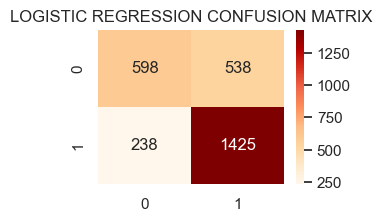

In [480]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (3,2))
sns.heatmap(confusion_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX");

# classification report

In [481]:
print("classification_report")
print(metrics.classification_report(y_test, y_pred_test))

classification_report
              precision    recall  f1-score   support

           0       0.72      0.53      0.61      1136
           1       0.73      0.86      0.79      1663

    accuracy                           0.72      2799
   macro avg       0.72      0.69      0.70      2799
weighted avg       0.72      0.72      0.71      2799



# Training Accuracy vs Test Accuracy, both seemed to be more or less same in accuracy

In [482]:
y_pred_train = logreg.predict(X_train)
print("Training Accuracy", metrics.accuracy_score(y_train, y_pred_train))
print("****************"*5)
print("Test Accuracy", metrics.accuracy_score(y_test, y_pred_test))

Training Accuracy 0.739163731046102
********************************************************************************
Test Accuracy 0.7227581279028225


# ROC - AUC

In [483]:
logistic_roc_auc = metrics.roc_auc_score(y_test, y_pred_test)
logistic_roc_auc

0.6916467990141693

In [484]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test)

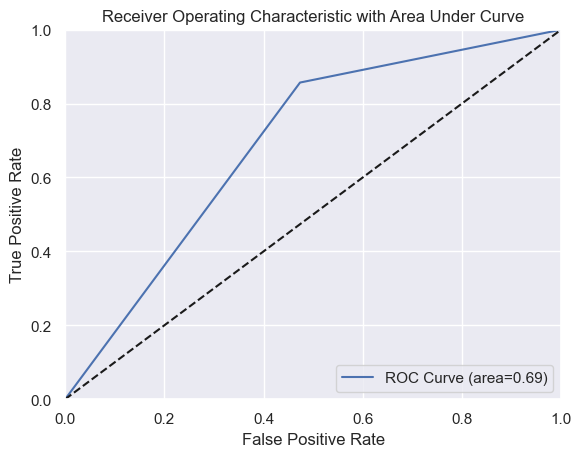

In [485]:
plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %logistic_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

# performing cross validation and observed that  accuracy max is 80% and min 68% 

In [486]:
# cross validation score - K_FOLD method
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(logreg, X_test, y_test, cv =20)
print(accuracy)
print('accuracy mean ', accuracy.mean())

[0.72142857 0.72857143 0.72857143 0.75714286 0.74285714 0.75714286
 0.72142857 0.69285714 0.77857143 0.66428571 0.76428571 0.77142857
 0.78571429 0.7        0.69285714 0.73571429 0.73571429 0.72857143
 0.73571429 0.6618705 ]
accuracy mean  0.7302363823227133


# using Random forest and found that accuracy improved to 78%

In [487]:
rclassifier = RandomForestClassifier(n_estimators=25, criterion='gini', random_state=1, max_depth=5)
rclassifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=25, random_state=1)

In [488]:
y_pred_test_rfc = rclassifier.predict(X_test)
score_rfc = metrics.accuracy_score(y_test, y_pred_test_rfc)
model_accuracy['RandomForestClassifier'] = score_rfc

Text(0.5, 1.0, 'RANDOM FOREST CONFUSION MATRIX')

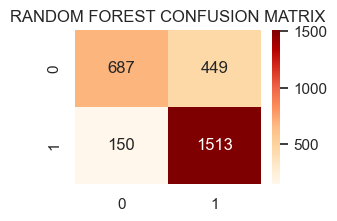

In [489]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_rfc)
plt.figure(figsize = (3,2))
sns.heatmap(confusion_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("RANDOM FOREST CONFUSION MATRIX")

# print classification report

In [490]:
print("classification_report")
print(metrics.classification_report(y_test, y_pred_test_rfc))

classification_report
              precision    recall  f1-score   support

           0       0.82      0.60      0.70      1136
           1       0.77      0.91      0.83      1663

    accuracy                           0.79      2799
   macro avg       0.80      0.76      0.77      2799
weighted avg       0.79      0.79      0.78      2799



# RandomForestClasifier cross validation

In [491]:
accuracy = cross_val_score(rclassifier, X_test, y_test, cv =20)
print(accuracy)
print('accuracy mean ', accuracy.mean())

[0.80714286 0.81428571 0.74285714 0.76428571 0.77142857 0.78571429
 0.79285714 0.76428571 0.83571429 0.72142857 0.77857143 0.83571429
 0.78571429 0.77857143 0.77857143 0.8        0.76428571 0.79285714
 0.79285714 0.79856115]
accuracy mean  0.7852852004110996


# Random forest feature importance

In [492]:
features_imp_dict= {}
for col, val in sorted(zip(x_cols_final.columns, rclassifier.feature_importances_),key=lambda x:x[1],reverse=True):
  features_imp_dict[col]=val
features_df_rf = pd.DataFrame({'Feature':features_imp_dict.keys(),'Importance':features_imp_dict.values()})
features_df_rf

,Feature,Importance
0,tenure,0.211375
1,MonthlyServiceCharges,0.187146
2,Agreement_Two year,0.145862
3,TotalAmount,0.128925
4,OnlineMovies_No internet service,0.038637
5,InternetConnection_Fiber optic,0.037694
6,OnlineSecurity_Yes,0.035808
7,InternetConnection_No,0.028067
8,TechnicalHelp_No internet service,0.027064
9,DeviceProtectionService_No internet service,0.024846


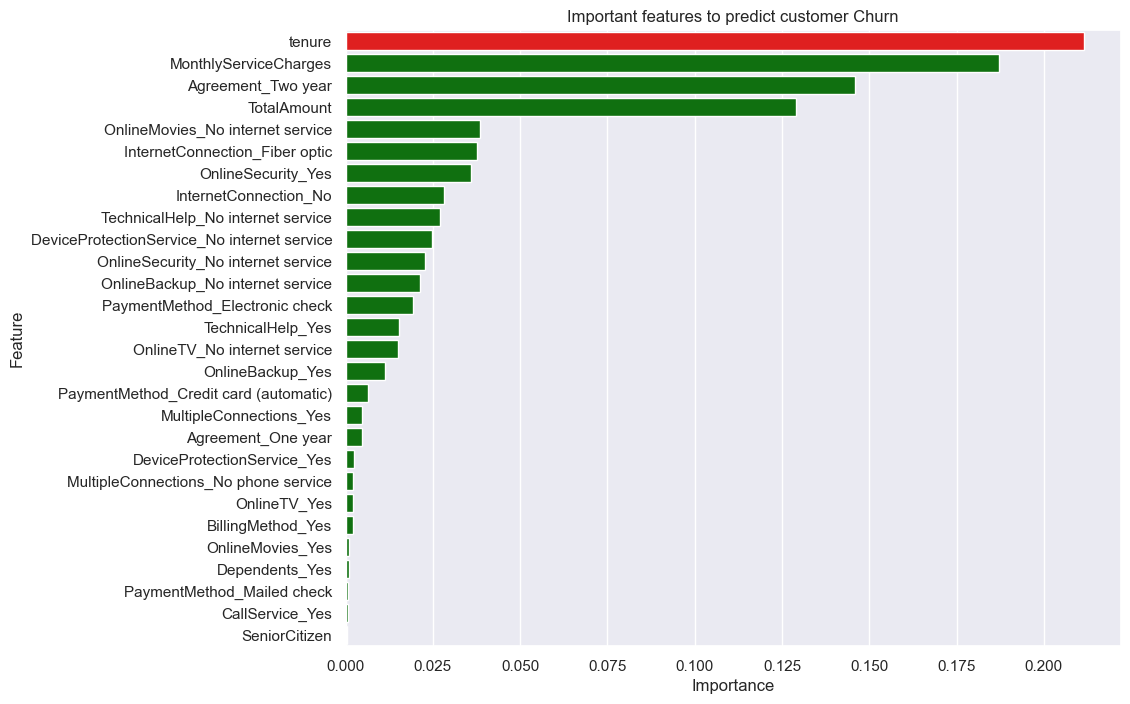

In [493]:
values = features_df_rf.Importance    
idx = features_df_rf.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict customer Churn')
plt.show()

# using GridSearchCV and Random Forest

In [494]:
# selected model up on accuracy score in RandomForestClassifier with Tunned HyperParams
params = {'n_estimators' : [30],
          'min_samples_split' : [8, 10, 12],
          'criterion' :['gini', 'entropy']
         }

rfc_gscv = GridSearchCV(RandomForestClassifier(),param_grid= params, scoring='roc_auc')
rfc_gscv.fit(X_train, y_train)
y_predicted = rfc_gscv.predict(X_test)

rfc_gscv_model = rfc_gscv.best_estimator_
print (rfc_gscv.best_score_, rfc_gscv.best_params_)

0.9104988863642556 {'criterion': 'entropy', 'min_samples_split': 8, 'n_estimators': 30}


In [495]:
y_pred_gscv = rfc_gscv.predict(X_test)
score_gscv = accuracy_score(y_test, y_pred_gscv)

model_accuracy['GridSearchCV_RFC'] = score_gscv

print("Grid Search CV", score_gscv)
print("classification_report")
print(metrics.classification_report(y_test, y_pred_gscv))

Grid Search CV 0.8081457663451233
classification_report
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1136
           1       0.84      0.84      0.84      1663

    accuracy                           0.81      2799
   macro avg       0.80      0.80      0.80      2799
weighted avg       0.81      0.81      0.81      2799



Text(0.5, 1.0, 'GRIDSEARCHCV RANDOM CLASSIFIER CONFUSION MATRIX')

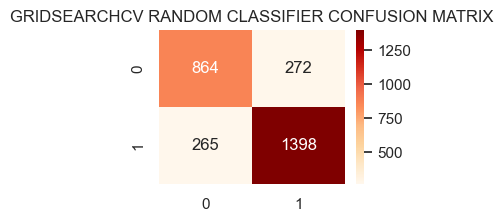

In [496]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_gscv)
plt.figure(figsize = (3,2))
sns.heatmap(confusion_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("GRIDSEARCHCV RANDOM CLASSIFIER CONFUSION MATRIX")

# using gradiant boosting classifier (reducing the errors) and further improvement on accuracy to 82%

In [497]:
gbc_classifier = GradientBoostingClassifier(random_state=0,max_depth=5,min_samples_split=50)
gbc_classifier.fit(X_train, y_train)
y_pred_gbcl = gbc_classifier.predict(X_test)

score_gbcl = accuracy_score(y_test, y_pred_gbcl)
model_accuracy['GradientBoostingClassifier'] = score_gbcl

print("Gradient Boosting Classifier", accuracy_score(y_test, y_pred_gbcl))

Gradient Boosting Classifier 0.8177920685959271


In [498]:
y_pred_gbcl = gbc_classifier.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, y_pred_gbcl))
print("classification_report")
print(metrics.classification_report(y_test, y_pred_gbcl))

Gradient Boosting Classifier 0.8177920685959271
classification_report
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1136
           1       0.84      0.86      0.85      1663

    accuracy                           0.82      2799
   macro avg       0.81      0.81      0.81      2799
weighted avg       0.82      0.82      0.82      2799



Text(0.5, 1.0, 'GRADIANT BOOSTING CLASSIFIER CONFUSION MATRIX')

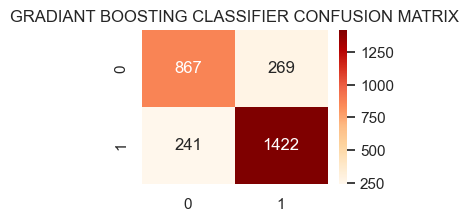

In [499]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_gbcl)
plt.figure(figsize = (3,2))
sns.heatmap(confusion_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("GRADIANT BOOSTING CLASSIFIER CONFUSION MATRIX")

# understanding the feature importance using gbc

In [500]:
# let's create a dictionary of features and their importance values
features_imp_dict= {}
for col, val in sorted(zip(x_cols_final.columns, gbc_classifier.feature_importances_),key=lambda x:x[1],reverse=True):
  features_imp_dict[col]=val
features_df = pd.DataFrame({'Feature':features_imp_dict.keys(),'Importance':features_imp_dict.values()})
features_df

,Feature,Importance
0,MonthlyServiceCharges,0.266159
1,tenure,0.208398
2,TotalAmount,0.095333
3,Agreement_Two year,0.090201
4,InternetConnection_No,0.032979
5,OnlineTV_No internet service,0.031074
6,InternetConnection_Fiber optic,0.030000
7,OnlineBackup_No internet service,0.029369
8,OnlineMovies_No internet service,0.023188
9,TechnicalHelp_No internet service,0.022890


# visualizing the important features, gbc

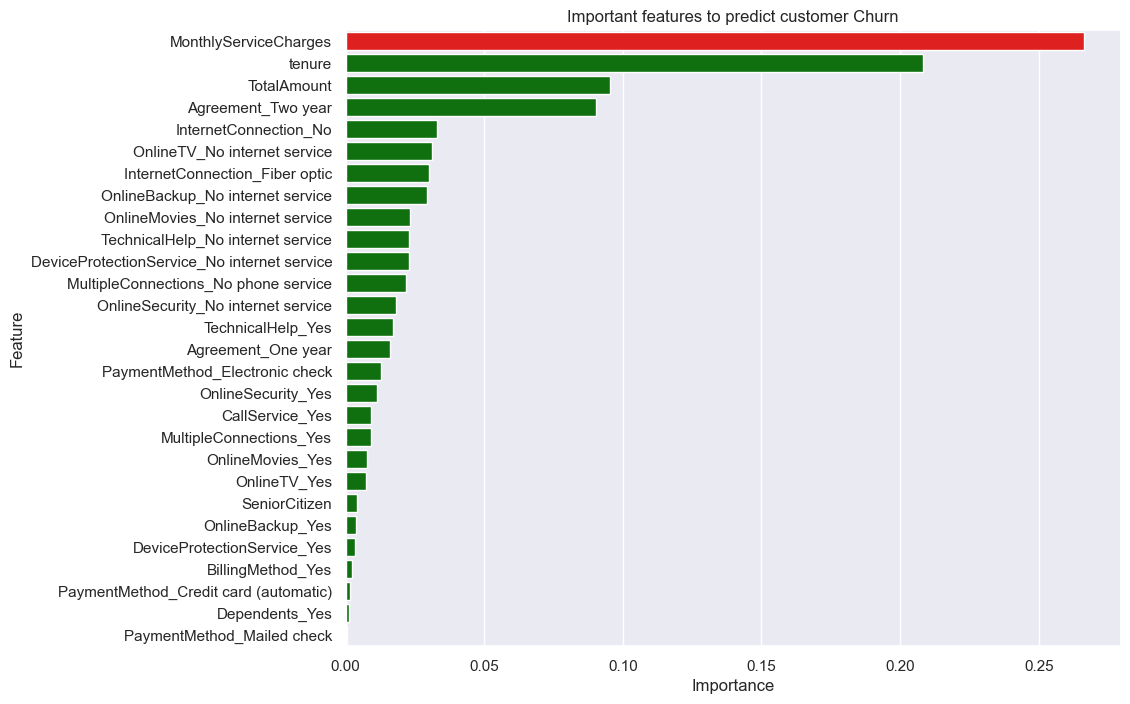

In [501]:
values = features_df.Importance    
idx = features_df.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict customer Churn')
plt.show()

# using RidgeClassifier to observe the model

In [502]:
rgclassifier = RidgeClassifier() 
rgclassifier.fit(X_train, y_train)

RidgeClassifier()

In [503]:
rgclassifier.fit(X_train, y_train) 
y_pred_train_rdg = rgclassifier.predict(X_train)
score_train_rdg = accuracy_score(y_train, y_pred_train_rdg)
print('RidgeClassifier training accuracy', score_train_rdg)

y_pred_test_rdg = rgclassifier.predict(X_test)
score_test_rdg = accuracy_score(y_test, y_pred_test_rdg)
model_accuracy['RidgeClassifier'] = score_test_rdg
print('RidgeClassifier testing accuracy', score_test_rdg)


RidgeClassifier training accuracy 0.7377852657374789
RidgeClassifier testing accuracy 0.7220435869953555


In [504]:
print("classification_report")
print(metrics.classification_report(y_test, y_pred_test_rdg))

classification_report
              precision    recall  f1-score   support

           0       0.72      0.52      0.60      1136
           1       0.72      0.86      0.79      1663

    accuracy                           0.72      2799
   macro avg       0.72      0.69      0.69      2799
weighted avg       0.72      0.72      0.71      2799



Text(0.5, 1.0, 'RidgeClassifier CONFUSION MATRIX')

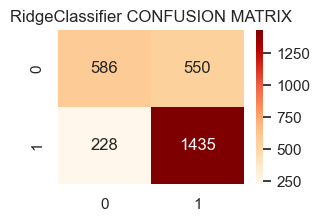

In [505]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_rdg)
plt.figure(figsize = (3,2))
sns.heatmap(confusion_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("RidgeClassifier CONFUSION MATRIX")

# using SVC

SVC training dataset:  0.8286108132945321
CV average score: 0.80
SVC testing accuracy 0.8149339049660593
SVC classification_report
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1136
           1       0.82      0.88      0.85      1663

    accuracy                           0.81      2799
   macro avg       0.81      0.80      0.80      2799
weighted avg       0.81      0.81      0.81      2799



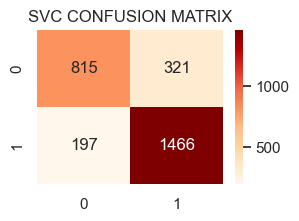

In [506]:
svc = SVC()
svc.fit(X_train, y_train)
score = svc.score(X_train, y_train)
print("SVC training dataset: ", score)

cv_scores = cross_val_score(svc, X_test, y_test, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

y_pred_svc = svc.predict(X_test)
score_test_svc = accuracy_score(y_test, y_pred_svc)
model_accuracy['SVC'] = score_test_svc
print('SVC testing accuracy', score_test_svc)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize = (3,2))
sns.heatmap(confusion_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("SVC CONFUSION MATRIX")

print("SVC classification_report")
print(metrics.classification_report(y_test, y_pred_svc))

# GridSearchCV(RandomForest), GradiantBoostingClassifier, SVC has better accuracy

In [507]:
model_accuracy

{'LogisticRegression': 0.7227581279028225,
 'RandomForestClassifier': 0.7859949982136477,
 'GridSearchCV_RFC': 0.8081457663451233,
 'GradientBoostingClassifier': 0.8177920685959271,
 'RidgeClassifier': 0.7220435869953555,
 'SVC': 0.8149339049660593}